# Visualizing MNIST data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MNIST dataset downloaded from 
# https://www.kaggle.com/c/digit-recognizer/data
df = pd.read_csv('mnist_train.csv')

# print()
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# first column in dataset is label
label = df['label']

data = df.drop('label',axis =1)

print(label.shape)
print(data.shape)

(42000,)
(42000, 784)


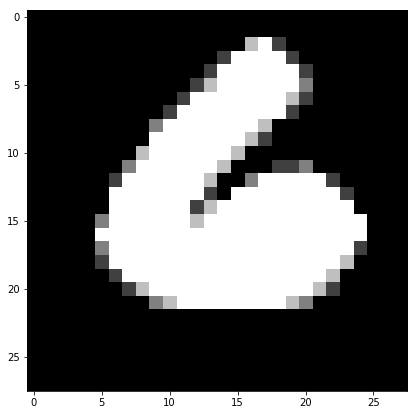

6


In [4]:
# displaying a image
plt.figure(figsize = (7,7))
index = 500
image = data.iloc[index].as_matrix().reshape(28,28)
plt.imshow(image , interpolation="none", cmap="gray")

plt.show()

print(label[index])

## 2d visualization of MNIST dataset

In [5]:
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(data)
print(std_data.shape)

(42000, 784)


In [6]:
std_data[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# getting covariance matrix

covariance_mat = np.matmul(std_data.T,std_data)
print("Shape of covariance matrix is : {}".format(covariance_mat.shape))

Shape of covariance matrix is : (784, 784)


In [8]:
# finding eigen values

from scipy.linalg import eigh

eigen_values, eigen_vectors = eigh(covariance_mat, eigvals = (782, 783))

print("Shape of top 2 eigen vectors : {}".format(eigen_vectors.shape))

Shape of top 2 eigen vectors : (784, 2)


In [9]:
print("top two eigen values : {}".format(eigen_values))

top two eigen values : [1222652.44613786 1709211.41082575]


In [10]:
eigen_vectors = eigen_vectors.T
eigen_vectors[1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.19928945e-04,  1.97228286e-05,  1.91397276e-04,  1.91397276e-04,
        0.00000000e+00, -2.22044605e-16,  0.00000000e+00,  6.93889390e-18,
       -3.46944695e-18, -8.67361738e-19,  0.00000000e+00,  2.71050543e-20,
        3.38813179e-21,  0.00000000e+00, -5.29395592e-23, -6.61744490e-24,
        0.00000000e+00, -1.03397577e-25,  0.00000000e+00, -8.07793567e-28,
        4.83135818e-04,  6.47441857e-04,  1.62679338e-03,  1.95537283e-03,
        2.74776969e-03,  3.75023065e-03,  4.56880011e-03,  4.15474601e-03,
        2.74718694e-03,  2.42695582e-03,  2.83337270e-03,  1.98778007e-03,
        1.17549167e-03,  5.21190421e-04,  1.96970841e-04,  7.86855737e-05,
       -4.52203347e-06,  7.59191543e-04,  4.88196899e-04, -7.18957771e-06,
        1.66466259e-48,  

In [11]:
# converting 784 dimensional points to 2-dimensional
new_points = np.matmul(eigen_vectors, std_data.T)
print("Shape of new points : {}".format(new_points.shape))

Shape of new points : (2, 42000)


In [12]:
# appending label to 2 dimensional data
print(label.shape)


(42000,)


In [13]:
new_points = np.vstack((new_points, label))
print("Shape of new points : {}".format(new_points.shape))

Shape of new points : (3, 42000)


In [14]:
import pandas as pd

df = pd.DataFrame(data=new_points.T, columns=("First_Principal","Second_Principal","label"))

print(df.head())

   First_Principal  Second_Principal  label
0        -5.226445         -5.140478    1.0
1         6.032996         19.292332    0.0
2        -1.705813         -7.644503    1.0
3         5.836139         -0.474207    4.0
4         6.024818         26.559574    0.0


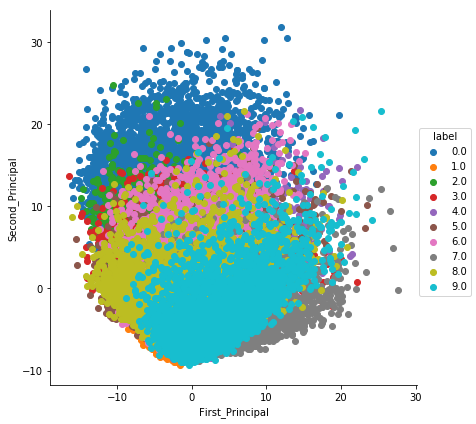

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.19928945e-04,  1.97228286e-05,  1.91397276e-04,  1.91397276e-04,
        0.00000000e+00, -2.22044605e-16,  0.00000000e+00,  6.93889390e-18,
       -3.46944695e-18, -8.67361738e-19,  0.00000000e+00,  2.71050543e-20,
        3.38813179e-21,  0.00000000e+00, -5.29395592e-23, -6.61744490e-24,
        0.00000000e+00, -1.03397577e-25,  0.00000000e+00, -8.07793567e-28,
        4.83135818e-04,  6.47441857e-04,  1.62679338e-03,  1.95537283e-03,
        2.74776969e-03,  3.75023065e-03,  4.56880011e-03,  4.15474601e-03,
        2.74718694e-03,  2.42695582e-03,  2.83337270e-03,  1.98778007e-03,
        1.17549167e-03,  5.21190421e-04,  1.96970841e-04,  7.86855737e-05,
       -4.52203347e-06,  7.59191543e-04,  4.88196899e-04, -7.18957771e-06,
        1.66466259e-48,  

In [15]:
# plotting the converted two dimensional datapoints

import seaborn as sn
import matplotlib.pyplot as plt

sn.FacetGrid(df, hue = 'label', size=6).map(plt.scatter, "First_Principal","Second_Principal").add_legend()

plt.show()
_

## PCA using Scikit

In [16]:
from sklearn import decomposition
pca = decomposition.PCA()

# configuring number of dimensions
pca.n_components = 2
pca_data = pca.fit_transform(std_data)

print("Shape of PCA data : {}".format(pca_data.shape))

Shape of PCA data : (42000, 2)


   Second_Principal  First_Principal  label
0         -5.140400        -5.226599    1.0
1         19.292320         6.032825    0.0
2         -7.644567        -1.705791    1.0
3         -0.474254         5.837335    4.0
4         26.559611         6.024422    0.0


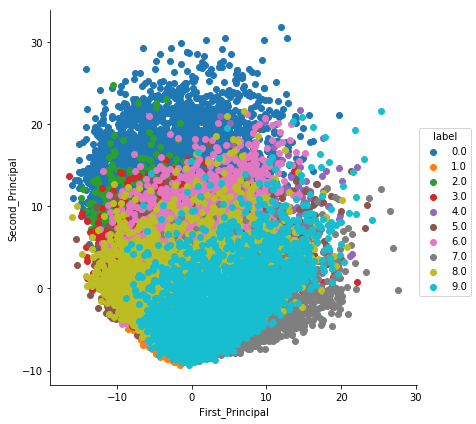

In [17]:
pca_data = np.vstack((pca_data.T, label))
df = pd.DataFrame(data=pca_data.T, columns=("Second_Principal","First_Principal","label"))

print(df.head())



sn.FacetGrid(df, hue = 'label', size=6).map(plt.scatter, "First_Principal","Second_Principal").add_legend()

plt.show()

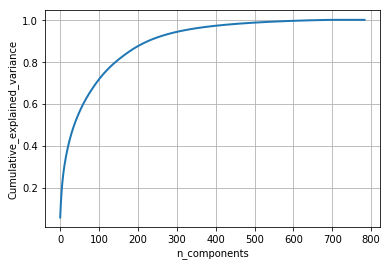

In [18]:
pca.n_components = 784
pca_data = pca.fit_transform(std_data)

per_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(per_var_explained)

# plot figure

plt.figure(1, figsize = (6 ,4 ))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [19]:
print(pca.explained_variance_)

[4.06964787e+01 2.91114657e+01 2.67833371e+01 2.08147194e+01
 1.81000206e+01 1.57876737e+01 1.38244007e+01 1.25432643e+01
 1.10638975e+01 1.00889267e+01 9.63617203e+00 8.65579470e+00
 8.04120472e+00 7.88086691e+00 7.43637560e+00 7.16743699e+00
 6.73538375e+00 6.61651973e+00 6.42354578e+00 6.26826675e+00
 5.93960379e+00 5.74928832e+00 5.48826880e+00 5.32649477e+00
 5.15217038e+00 4.94730998e+00 4.88853571e+00 4.70777145e+00
 4.46528559e+00 4.36351702e+00 4.32543150e+00 4.22712324e+00
 4.08726514e+00 4.06176768e+00 3.99903435e+00 3.86804997e+00
 3.81925839e+00 3.71256507e+00 3.57437538e+00 3.45887625e+00
 3.41436841e+00 3.36945857e+00 3.25693182e+00 3.24008824e+00
 3.18312949e+00 3.16286640e+00 3.14244041e+00 3.09287815e+00
 3.06368054e+00 3.02342271e+00 2.96849737e+00 2.91830693e+00
 2.84948896e+00 2.82806029e+00 2.79589667e+00 2.76696531e+00
 2.68974637e+00 2.63703541e+00 2.60842615e+00 2.58938021e+00
 2.50126884e+00 2.48576071e+00 2.44558621e+00 2.41712754e+00
 2.39156842e+00 2.382311

## t-sne using scikit on MNIST data

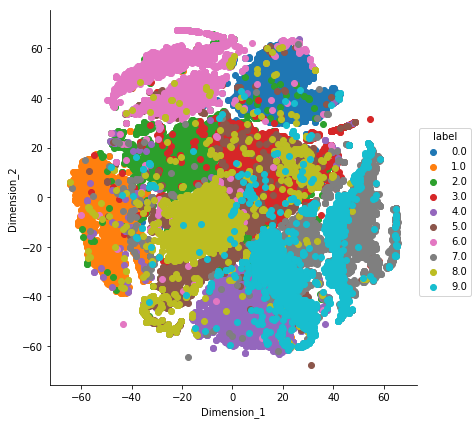

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0)

t_data = model.fit_transform(std_data)

t_data = np.vstack((t_data.T, label)).T

df = pd.DataFrame(data=t_data, columns=("Dimension_1","Dimension_2","label"))
sn.FacetGrid(df, hue = 'label', size=6).map(plt.scatter,"Dimension_1","Dimension_2").add_legend() 

plt.show()

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)

t_data = model.fit_transform(std_data)

t_data = np.vstack((t_data.T, label)).T

df = pd.DataFrame(data=t_data, columns=("Dimension_1","Dimension_2","label"))
sn.FacetGrid(df, hue = 'label', size=6).map(plt.scatter,"Dimension_1","Dimension_2").add_legend() 

plt.show()

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0, perplexity = 2)

t_data = model.fit_transform(std_data)

t_data = np.vstack((t_data.T, label)).T

df = pd.DataFrame(data=t_data, columns=("Dimension_1","Dimension_2","label"))
sn.FacetGrid(df, hue = 'label', size=6).map(plt.scatter,"Dimension_1","Dimension_2").add_legend() 

plt.show()